# Experiment 1. 

I am running the algorithms without introducing additional edges.

In [1]:
import preprocessing as ps
import numpy as np
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import random
random.seed(42)

In [2]:
# Load the data
dataset = pickle.load(open('./networks/network.pkl', 'rb'))

In [3]:
# create the project networks
list_1 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T')]
list_2 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T'), ('DM', 'DB'), ('DM', 'AI'), ('DB', 'AI')]
list_3 = [('DM', 'T'), ('DB', 'T'), ('AI', 'DB')]

star_proj = ps.createProjectNetwork(list_1)
full_proj = ps.createProjectNetwork(list_2)
chain_proj = ps.createProjectNetwork(list_3)

## Experiment 1.a 

In this experiment:
1. I am running on the entire network
2. I use Average weight score as the metric to measure the influence of a node.


In [ ]:
network = dataset.copy()

##### Star-Structured Project

In [ ]:
# Greedy
max_communication_efficiency = 0.0
best_set = set()
for node in network.nodes():
    subset, comm_eff = ps.Greedy(network, star_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set)))
print(f"Total Communication Efficiency : {max_communication_efficiency}") 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network, node)}")

In [ ]:
# Influence Greedy
max_communication_efficiency = 0.0
best_set = set()
print("Influential First")
influential_nodes = ps.get_top_ranked_node_each_group(network)
for node in influential_nodes:
    # print(f"Seed node: {node}")
    subset, comm_eff = ps.Greedy(network, star_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set)))
print(f"Total Communication Efficiency : {max_communication_efficiency}") 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node}, Rank: {ps.get_node_rank(network, node)}")

##### Fully-Connected-Structured Project.

In [ ]:
# Greedy
max_communication_efficiency = 0.0
best_set = set()
for node in network.nodes():
    subset, comm_eff = ps.Greedy(network, full_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

# print(f"Best set: {best_set}")
print(f"Total Communication Efficiency : {max_communication_efficiency}")
print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set))) 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network, node)}")

In [ ]:
# Influence Greedy
max_communication_efficiency = 0.0
best_set = set()
print("Influential First")
influential_nodes = ps.get_top_ranked_node_each_group(network)
for node in influential_nodes:
    # print(f"Seed node: {node}")
    subset, comm_eff = ps.Greedy(network, full_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set)))
print(f"Total Communication Efficiency : {max_communication_efficiency}") 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network, node)}")

##### Chain-structured Project

In [ ]:
# Experiment on Project One
max_communication_efficiency = 0.0
best_set = set()
for node in network.nodes():
    # print(f"Seed node: {node}")
    subset, comm_eff = ps.Greedy(network, chain_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print(f"Total Communication Efficiency : {max_communication_efficiency}")
print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set))) 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network, node)}")

In [ ]:
# Experiment on Project One
max_communication_efficiency = 0.0
best_set = set()
print("Influential First")
influential_nodes = ps.get_top_ranked_node_each_group(network)
for node in influential_nodes:
    subset, comm_eff = ps.Greedy(network, chain_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set)))
print(f"Total Communication Efficiency : {max_communication_efficiency}") 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network, node)}")

## Experiment 1.b

In this experiment, 
1. I run on samples of the network. (10, 20, 30, 40, 50)
   - First using uniform random sampling.
   - Second using top nodes strategy.
2. I am using the average sum of adjacent weights as the team influence measure. 

### Uniform Random Sampling

#### 10 Nodes per Team

In [ ]:
# Create a smaller graph of 240 nodes, 60 from each team. vary between 20, 50, 100 nodes per team. 

# Create a list to store the selected samples
selected_samples = []
labels = ['T', 'DM', 'DB', 'AI']

# Iterate over each label
for label in labels:
    # Get all the nodes with the current label
    nodes_with_label = [node for node in dataset.nodes if dataset.nodes[node]['label'] == label]
    
    # Randomly select 60 nodes from the current label
    selected_nodes = random.sample(nodes_with_label, 60)
    
    # Add the selected nodes to the list of selected samples
    selected_samples.extend(selected_nodes)

# Create a new graph with the selected samples
selected_dataset = dataset.subgraph(selected_samples)

In [5]:
# Creating a copy of the sample network
network = selected_dataset.copy()

##### Star-Structured Project

In [9]:
# Greedy
max_communication_efficiency = 0.0
best_set = set()
for node in network.nodes():
    subset, comm_eff = ps.Greedy(network, star_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set)))
print(f"Total Communication Efficiency : {max_communication_efficiency}") 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network, node)}")

Coordinators communication efficiency 151.26990982021493
Total Communication Efficiency : 363.7779
Team :AI, Node: David Sontag Rank: 1
Team :DM, Node: Rosie Jones Rank: 17
Team :T, Node: Paul Dütting Rank: 31
Team :DB, Node: Flavio Junqueira Rank: 4


In [10]:
# Influence Greedy
max_communication_efficiency = 0.0
best_set = set()
print("Influential First")
influential_nodes = ps.get_top_ranked_node_each_group(network)
for node in influential_nodes:
    # print(f"Seed node: {node}")
    subset, comm_eff = ps.Greedy(network, star_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set)))
print(f"Total Communication Efficiency : {max_communication_efficiency}") 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node}, Rank: {ps.get_node_rank(network, node)}")

Influential First
{'AI': 'David Sontag', 'DB': 'Senjuti Basu Roy', 'T': 'Morteza Zadimoghaddam', 'DM': 'Xing Wei'}
Coordinators communication efficiency 132.19148414127233
Total Communication Efficiency : 312.482
Team :DB, Node: Senjuti Basu Roy, Rank: 1
Team :AI, Node: David Sontag, Rank: 1
Team :DM, Node: Rosie Jones, Rank: 17
Team :T, Node: Paul Dütting, Rank: 31


In [11]:
# # Plot the chain_proj graph
# nx.draw(network.subgraph(subset), with_labels=True)
# plt.show()

##### Fully-Connected-Structured Project.

In [14]:
# Greedy
max_communication_efficiency = 0.0
best_set = set()
for node in network.nodes():
    subset, comm_eff = ps.Greedy(network, full_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

# print(f"Best set: {best_set}")
print(f"Total Communication Efficiency : {max_communication_efficiency}")
print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set))) 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network, node)}")

Total Communication Efficiency : 363.7779
Coordinators communication efficiency 151.26990982021493
Team :AI, Node: David Sontag Rank: 1
Team :DM, Node: Rosie Jones Rank: 17
Team :T, Node: Paul Dütting Rank: 31
Team :DB, Node: Flavio Junqueira Rank: 4


In [15]:
# Influence Greedy
max_communication_efficiency = 0.0
best_set = set()
print("Influential First")
influential_nodes = ps.get_top_ranked_node_each_group(network)
for node in influential_nodes:
    # print(f"Seed node: {node}")
    subset, comm_eff = ps.Greedy(network, full_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set)))
print(f"Total Communication Efficiency : {max_communication_efficiency}") 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network, node)}")

Influential First
{'AI': 'David Sontag', 'DB': 'Senjuti Basu Roy', 'T': 'Morteza Zadimoghaddam', 'DM': 'Xing Wei'}
Coordinators communication efficiency 132.19148414127233
Total Communication Efficiency : 312.482
Team :DB, Node: Senjuti Basu Roy Rank: 1
Team :AI, Node: David Sontag Rank: 1
Team :DM, Node: Rosie Jones Rank: 17
Team :T, Node: Paul Dütting Rank: 31


##### Chain-structured Project

In [18]:
# Experiment on Project One
max_communication_efficiency = 0.0
best_set = set()
for node in network.nodes():
    # print(f"Seed node: {node}")
    subset, comm_eff = ps.Greedy(network, chain_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print(f"Total Communication Efficiency : {max_communication_efficiency}")
print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set))) 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network, node)}")

Total Communication Efficiency : 363.7779
Coordinators communication efficiency 151.26990982021493
Team :AI, Node: David Sontag Rank: 1
Team :DM, Node: Rosie Jones Rank: 17
Team :T, Node: Paul Dütting Rank: 31
Team :DB, Node: Flavio Junqueira Rank: 4


In [19]:
# Experiment on Project One
max_communication_efficiency = 0.0
best_set = set()
print("Influential First")
influential_nodes = ps.get_top_ranked_node_each_group(network)
for node in influential_nodes:
    subset, comm_eff = ps.Greedy(network, chain_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set)))
print(f"Total Communication Efficiency : {max_communication_efficiency}") 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network, node)}")

Influential First
{'AI': 'David Sontag', 'DB': 'Senjuti Basu Roy', 'T': 'Morteza Zadimoghaddam', 'DM': 'Xing Wei'}
Coordinators communication efficiency 132.19148414127233
Total Communication Efficiency : 312.482
Team :DB, Node: Senjuti Basu Roy Rank: 1
Team :AI, Node: David Sontag Rank: 1
Team :DM, Node: Rosie Jones Rank: 17
Team :T, Node: Paul Dütting Rank: 31


#### 20 Nodes per Team

In [ ]:
# Create a list to store the selected samples
selected_samples = []
labels = ['T', 'DM', 'DB', 'AI']

# Iterate over each label
for label in labels:
    # Get all the nodes with the current label
    nodes_with_label = [node for node in dataset.nodes if dataset.nodes[node]['label'] == label]
    
    # Randomly select 60 nodes from the current label
    selected_nodes = random.sample(nodes_with_label, 20)
    
    # Add the selected nodes to the list of selected samples
    selected_samples.extend(selected_nodes)

# Create a new graph with the selected samples
selected_dataset = dataset.subgraph(selected_samples)

# Creating a copy of the sample network
network = selected_dataset.copy()

##### Star-Structured Project

In [ ]:
# Greedy
max_communication_efficiency = 0.0
best_set = set()
for node in network.nodes():
    subset, comm_eff = ps.Greedy(network, star_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set)))
print(f"Total Communication Efficiency : {max_communication_efficiency}") 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network, node)}")

In [ ]:
# Influence Greedy
max_communication_efficiency = 0.0
best_set = set()
print("Influential First")
influential_nodes = ps.get_top_ranked_node_each_group(network)
for node in influential_nodes:
    # print(f"Seed node: {node}")
    subset, comm_eff = ps.Greedy(network, star_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set)))
print(f"Total Communication Efficiency : {max_communication_efficiency}") 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node}, Rank: {ps.get_node_rank(network, node)}")

##### Fully-Connected-Structured Project.

In [ ]:
# Greedy
max_communication_efficiency = 0.0
best_set = set()
for node in network.nodes():
    subset, comm_eff = ps.Greedy(network, full_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

# print(f"Best set: {best_set}")
print(f"Total Communication Efficiency : {max_communication_efficiency}")
print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set))) 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network, node)}")

In [ ]:
# Influence Greedy
max_communication_efficiency = 0.0
best_set = set()
print("Influential First")
influential_nodes = ps.get_top_ranked_node_each_group(network)
for node in influential_nodes:
    # print(f"Seed node: {node}")
    subset, comm_eff = ps.Greedy(network, full_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set)))
print(f"Total Communication Efficiency : {max_communication_efficiency}") 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network, node)}")

##### Chain-structured Project

In [ ]:
# Greedy
max_communication_efficiency = 0.0
best_set = set()
for node in network.nodes():
    # print(f"Seed node: {node}")
    subset, comm_eff = ps.Greedy(network, chain_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print(f"Total Communication Efficiency : {max_communication_efficiency}")
print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set))) 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network, node)}")

In [ ]:
# Influence Greedy
max_communication_efficiency = 0.0
best_set = set()
print("Influential First")
influential_nodes = ps.get_top_ranked_node_each_group(network)
for node in influential_nodes:
    subset, comm_eff = ps.Greedy(network, chain_proj, node)
    if comm_eff > max_communication_efficiency:
        max_communication_efficiency = comm_eff
        best_set = subset

print("Coordinators communication efficiency", ps.sum_edge_weights(network.subgraph(best_set)))
print(f"Total Communication Efficiency : {max_communication_efficiency}") 

for node in best_set:
    print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {ps.get_node_rank(network, node)}")

#### 30 Nodes per Team

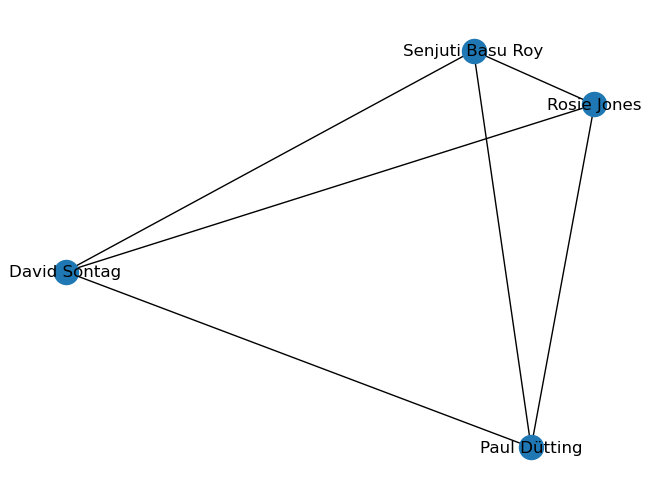

In [20]:
# Plot the chain_proj graph
nx.draw(network.subgraph(best_set), with_labels=True)
plt.show()

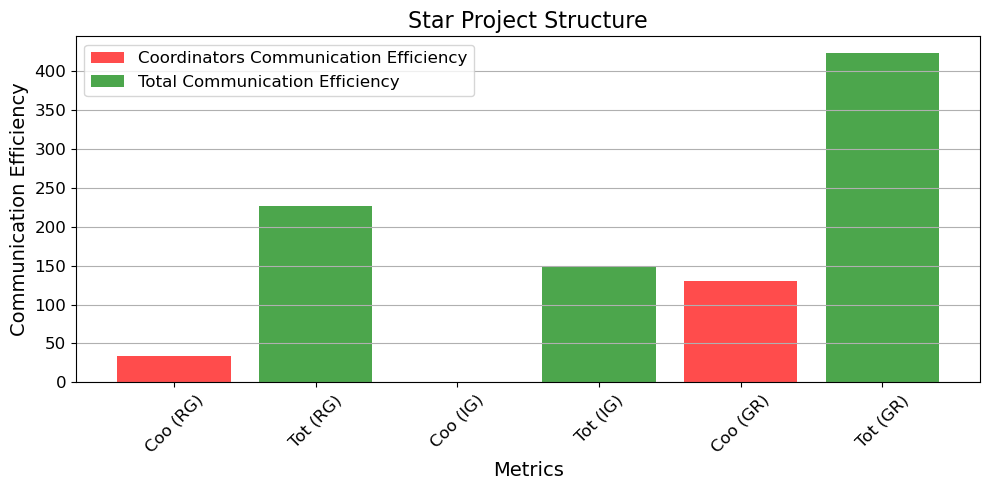

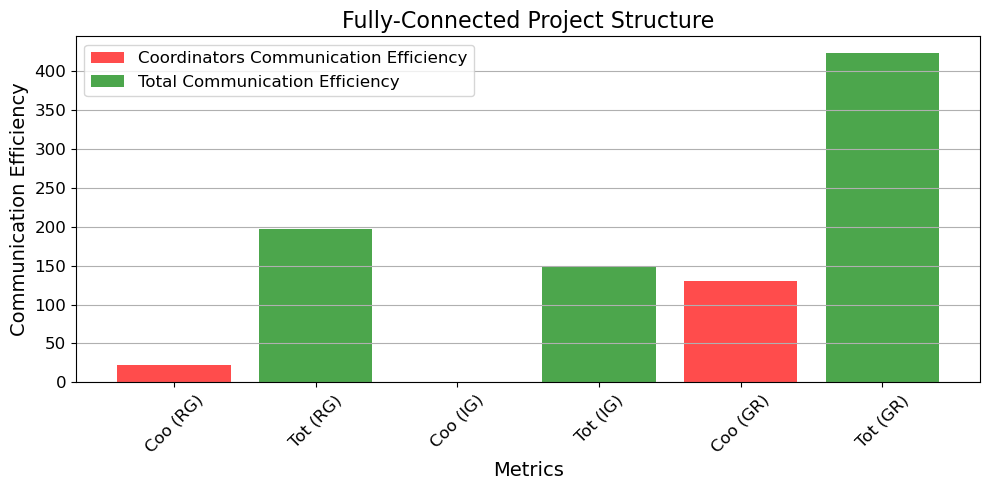

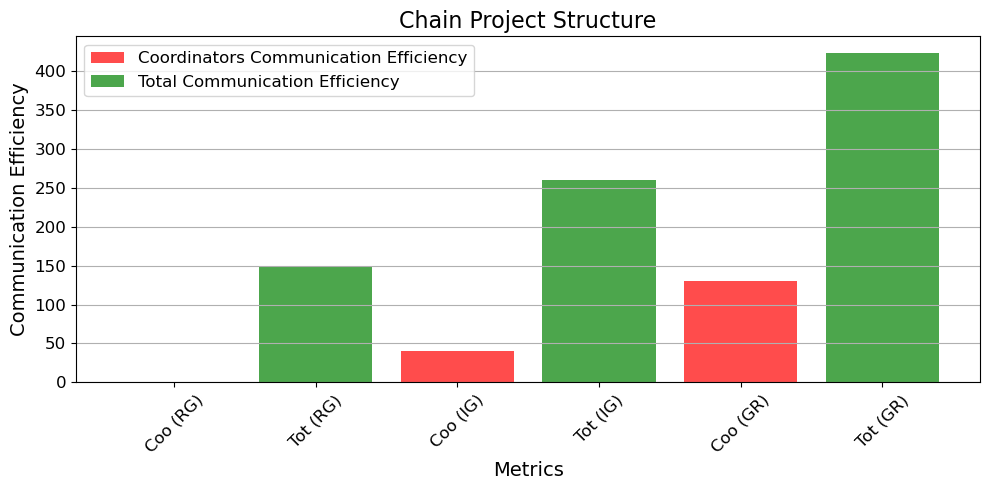

In [21]:
import matplotlib.pyplot as plt

# Data for the plots
data = {
    'Star': {
        'Random Greedy': {
            'Coordinators Communication Efficiency': 33.33,
            'Total Communication Efficiency': 225.9043
        },
        'Influence Greedy': {
            'Coordinators Communication Efficiency': 0,
            'Total Communication Efficiency': 150.0
        },
        'Greedy': {
            'Coordinators communication efficiency': 130.0,
            'Total Communication Efficiency': 423.2008,
        }
    },
    'Fully-Connected': {
        'Random Greedy': {
            'Coordinators Communication Efficiency': 22.220000000000002,
            'Total Communication Efficiency': 196.5813
        },
        'Influence Greedy': {
            'Coordinators Communication Efficiency': 0,
            'Total Communication Efficiency': 150.0
        },
        'Greedy': {
            'Coordinators communication efficiency': 130.0,
            'Total Communication Efficiency': 423.2008,
        }
    },
    'Chain': {
        'Random Greedy': {
            'Coordinators Communication Efficiency': 0,
            'Total Communication Efficiency': 150.0
        },
        'Influence Greedy': {
            'Coordinators Communication Efficiency': 40.0,
            'Total Communication Efficiency': 260.0
        },
        'Greedy': {
            'Coordinators communication efficiency': 130.0,
            'Total Communication Efficiency': 423.2008,
        }
    }
}

# Define abbreviations for the algorithms
abbreviations = {'Random Greedy': 'RG', 'Influence Greedy': 'IG', 'Greedy': 'GR'}

# Plotting
for project, algorithms in data.items():
    plt.figure(figsize=(10, 5))
    plt.title(f'{project} Project Structure', fontsize=16)
    legends_added = False  # Flag to track if legends have been added
    for algorithm, metrics in algorithms.items():
        x = range(len(metrics))
        colors = ['r', 'g']
        abbrev = abbreviations[algorithm]
        for i, (metric, value) in enumerate(metrics.items()):
            color = colors[i] if 'Coordinators' in metric else 'g'
            plt.bar(f'{metric[:3]} ({abbrev})', value, label=metric, color=color, alpha=0.7)
        # Add legend if it hasn't been added before
        if not legends_added:
            plt.legend(fontsize=12)
            legends_added = True  # Set the flag to True after adding legends
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Communication Efficiency', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()